In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() { if (code_show){ $('div.input').hide(); } else { $('div.input').show(); } code_show = !code_show } 
$( document ).ready(code_toggle);
</script>

Raw code hidden. To show code, click <a href="javascript:code_toggle()">here</a>. <b>To begin the notebook, click Kernel then click Restart & Run All. </b> ''')

![Callysto.ca Banner](https://github.com/callysto/curriculum-notebooks/blob/master/callysto-notebook-banner-top.jpg?raw=true)

<center><h1>Combining and Editing Motifs</h1></center>
    
#### Authors: Howell Tan, Jenifer Pham & Laura Gutierrez Funderburk, Cedric Chauve
#### Contact: [Dr. Cedric Chauve](https://cchauve.github.io) and [Dr. Veselin Jungic](http://people.math.sfu.ca/~vjungic/)
#### This is joint collaboration with Tla'amin Nation members: Ms. Betty Wilson, Ms. Gail Blaine, and Mr. Tyler Peters.
#### Acknowledgements:
We thank the Tla'amin Nation and members Ms. Betty Wilson, Ms. Gail Blaine, and Mr. Tyler Peters for sharing their knowledge and wisdom on the craft of traditional basket weaving. Without their openness this project would have not taken place. We also acknowledge that this work was conducted in unceded territory of the Musqueam , Skxwú7mesh, Tsleil-Waututh, Kwikwetlem nations. We thank PIMS and Cybera, as well as the Government of Canada for providing financial support and infrastructure.
#### Last modified: October 26, 2018

In [2]:
%matplotlib inline
%run -i ./python_scripts/modules.py
%run -i ./python_scripts/colours.py
%run -i ./python_scripts/atomic_rectangle.py
%run -i ./python_scripts/atomic_triangle.py
%run -i ./python_scripts/atomic_chevron.py
%run -i ./python_scripts/operations.py
%run -i ./python_scripts/plotting.py
%run -i ./python_scripts/modify_patterns.py

In [3]:
%%html
<style>
.output_wrapper button.btn.btn-default,
.output_wrapper .ui-dialog-titlebar {
  display: none;
}
</style>

In [4]:
def rerun_cell(ev):
    
    display(Javascript('IPython.notebook.execute_cell_range(IPython.notebook.get_selected_index()+1,IPython.notebook.get_selected_index()+2)'))

In [5]:
def generate_pattern_dir_listing():
    global pattern_files
    
    pattern_files = os.listdir('./patterns/')
    
    if '.ipynb_checkpoints' in pattern_files:
        pattern_files.remove('.ipynb_checkpoints')
        
    if 'dirList' in pattern_files:
        pattern_files.remove('dirList')
        
    pattern_files_string = ", ".join(pattern_files)
    
    file = open("./patterns/dirList", "w")    
    file.write(pattern_files_string)
    file.close()


def save_joined_pattern(ev):
    global pattern_files
    
    display(Javascript('IPython.notebook.execute_cell_range(IPython.notebook.get_selected_index(), IPython.notebook.get_selected_index()+1)'))

    # List Pattern Text Files
    pattern_files = os.listdir("./patterns/")
    
    # Remove checkpoints from folder if exists
    if '.ipynb_checkpoints' in pattern_files:
        pattern_files.remove('.ipynb_checkpoints')
    
    # Check if file name is taken
    if (file_name1.value in pattern_files):
        display( Markdown("The file <b>" +  file_name1.value + '</b> already exists. If you still would like to save your pattern as <b>' + file_name1.value + '</b>, delete the file and save again.') )
    
    # Write joined pattern into text file
    elif (file_name1.value != ''):
        file = open("./patterns/" + file_name1.value, "w")
        new_pattern = join_patterns(first, second, spacing.value)

        file.write(new_pattern)
        file.close()

        display(Markdown("Your motif has been saved as <b>" + file_name1.value + "</b>."))

## called by JS element
def save_edited_pattern(file_name2, new_pattern):
    global pattern_files
    
    # List Pattern Text Files
    pattern_files = os.listdir("./patterns/")

    # Remove checkpoints from folder if exists
    if '.ipynb_checkpoints' in pattern_files:
        pattern_files.remove('.ipynb_checkpoints')
    
    # Write edited pattern into text file
    if (file_name2 != ''):
        file = open("./patterns/" + file_name2, "w")
        
        file.write(new_pattern)
        file.close()
        
    generate_pattern_dir_listing()
    

def refresh_list(ev):
    global pattern_files
    
    # List Pattern Text Files
    pattern_files = os.listdir("./patterns/")

    if '.ipynb_checkpoints' in pattern_files:
        pattern_files.remove('.ipynb_checkpoints')
        
    #remove directory listing created for JS element
    if 'dirList' in pattern_files:
        pattern_files.remove('dirList')
    
    # Rerun cell to refresh list of files in pattern folder
    display(Javascript('IPython.notebook.execute_cell_range(IPython.notebook.get_selected_index(), IPython.notebook.get_selected_index()+1)'))

def apply_alteration(ev):
    global create_button_clicked, join_button_clicked, edit_button_clicked
    create_button_clicked = True
    join_button_clicked = True
    edit_button_clicked = True
    
    # Run cell below
    display(Javascript('IPython.notebook.execute_cell_range(IPython.notebook.get_selected_index()+1, IPython.notebook.get_selected_index()+3)'))
    

In [6]:
global pattern_files, new_pattern, file_name, save_button

# Create folder name patterns in pattern folder does not exist
if not os.path.exists('patterns'):
    os.makedirs('patterns')
        
# List Pattern Text Files
pattern_files = os.listdir("./patterns/")

#remove directory listing created for JS element
if 'dirList' in pattern_files:
    pattern_files.remove('dirList')

# Remove checkpoints from folder if exists
if '.ipynb_checkpoints' in pattern_files:
    pattern_files.remove('.ipynb_checkpoints')

    

In [7]:
# Define layout and style of widgets
box_layout = Layout(display='flex', flex_flow='row', align_items='center', width='100%', justify_content = 'center')
style = {'description_width': 'initial'}

## Combining motifs
   
The motifs that we have seen up until now have been generated from a single atomic motif. A basket sometimes displays multiple motifs, combined together. To do so, our tool below allows to select two motifs created previously, set the desired spacing between them, and click the Join motifs button. 

Two motifs of the same height will be simply be previewed side by side. motifs of unequal heights need additional blocks added to the top and bottom of the motif with lower valued height in order for the height dimensions to match. Thus, the motif of lower valued height will be horizontally centered alongside the motif with higher valued height. 

Once two motifs have been joined, you can save the motif and continue to combine more motifs to your new motif if you wish. If you have saved your motif but do not see the file in the dropdown menu, try clicking on the Refresh Files button.


In [13]:
global join_button_clicked
join_button_clicked = False

# Layout for widgets
box_layout = Layout(display='flex', flex_flow='row', align_items='center', width='100%', justify_content = 'center')
style = {'description_width': 'initial'}

# Create dropdown menu for patterns
first_pattern = widgets.Dropdown(options = pattern_files, description ='Motif 1:', style = style, disabled=False,)
second_pattern = widgets.Dropdown(options = pattern_files, description ='Motif 2:', style = style, disabled=False,)
spacing = widgets.IntSlider(value = 0, min = 0, max = 10, description = "Spacing Amount", style = style)

# Create join and refresh button and define click events
join_button = widgets.Button( button_style= 'info', description="Join Motifs")
join_button.on_click(apply_alteration)

refresh_button = widgets.Button( button_style= 'info', description="Refresh Files")
refresh_button.on_click(refresh_list)

display(Box(children = [first_pattern, second_pattern, refresh_button], layout = box_layout))
display(VBox(children = [spacing, join_button], layout = Layout(display= 'flex', flex_flow= 'column', align_items= 'center', width='100%', justify_content = 'center')))

# Create saving widgets
save_button1 = widgets.Button(button_style= 'info',description="Save")
save_button1.on_click(save_joined_pattern)

file_name1 = widgets.Text(value = '', description='File Name:', disabled=False)

<IPython.core.display.Javascript object>

Box(children=(Dropdown(description='Motif 1:', options=('Cross', 'Expanded Triangle', 'Square Rectangle', 'Dia…

<IPython.core.display.Javascript object>

<center> <h3> Motif Preview </h3>

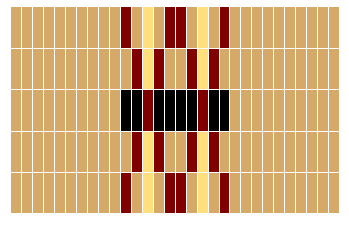

In [14]:
if (join_button_clicked == True and pattern_files != []):
    
    display(Markdown('<center> <h3> Motif Preview </h3>'))
    
    # Read chosen pattern text files, join the patterns and display new pattern
    first = open('./patterns/'+ first_pattern.value, 'r') 
    first = first.read()
    second = open('./patterns/'+ second_pattern.value, 'r') 
    second = second.read()

    new_pattern = join_patterns(first, second, spacing.value)
    plot_motif_2D(new_pattern, ori_p)

In [15]:
if (join_button_clicked == True and pattern_files != []):

    display(file_name1, save_button1)

Text(value='', description='File Name:')

Button(button_style='info', description='Save', style=ButtonStyle())

## Editing motifs & Creating your own motif
    
All motifs emerge from a blank canvas. If you click "Create Blank Canvas", you have full autonomy to create your own motif from scratch. Start by specifying the height and width of your canvas. That is, choose the number of respective rows and columns you would like your canvas to have. Note only positive integers values will be accepted. Decimal inputs will be rounded down to the nearest integer.

Once you have specified your dimensions, click the "Create Blank Canvas" button. To create your motif, choose a color and click on a block to change its color. To erase, choose the last color and click on the block you wish to erase.

However, if you want to edit an existing canvas, we can manually edit motifs by selecting a canvas you want from the "Select a file:" drop-down menu and clicking "Edit Canvas". To make changes to your motif, choose a color and click on a block in your motif display to change its color. To erase, choose the last color and click on the block you wish to erase.


In [11]:
from IPython.display import HTML
HTML(filename="./html_scripts/createCanvas.html")

In [12]:
%%html
<script>
    // AUTORUN ALL CELLS ON NOTEBOOK-LOAD!
    require(
        ['base/js/namespace', 'jquery'], 
        function(jupyter, $) {
            $(jupyter.events).on("kernel_ready.Kernel", function () {
            
                jupyter.actions.call('jupyter-notebook:save-notebook');
                
            });
        }
    );
</script>

[![Callysto.ca License](https://github.com/callysto/curriculum-notebooks/blob/master/callysto-notebook-banner-bottom.jpg?raw=true)](https://github.com/callysto/curriculum-notebooks/blob/master/LICENSE.md)